In [1]:
import time
t0 = time.time()
import json
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Read data and draw some figures
import json

# Open and read the JSON file
with open(r'C:\Users\julyj\OneDrive\Desktop\Classes\Princeiples of OR\KND.json', 'r') as file:
    data = json.load(file)

# Print the data
print(data)


[{'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'B', 'Donor': ['A']}, {'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'O', 'Donor': ['B', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'O', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['B', 'A']}, {'Recipient': 'A

In [3]:
import networkx as nx

# Create a graph
G = nx.DiGraph()

# Create nodes
counter = 1
for element in data:
    #print(element)
    G.add_nodes_from([(counter, element)])
    counter += 1

#G.add_nodes_from(data)

print(G.nodes)

donor_recipient_compatibility = {'O': ['O', 'A', 'B', 'AB'], 'A': ['A', 'AB'], 'B':['B', 'AB'], 'AB':['AB']}

# Create edges (relations)
for node in G.nodes:
    donors = G.nodes[node]['Donor']
    #print(donors)
    for donor in donors:
        for vertex in G.nodes:
            if node == vertex: continue
            recipient = G.nodes[vertex]['Recipient']
            if recipient not in donor_recipient_compatibility[donor]: continue
            G.add_edge(node, vertex)    
                
# Visualize the initial graph
#visualize_graph(G, "Initial Graph")
#print('edges:', G.edges)    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [4]:
# Find cycles of length 3

potential_cycle_3 = []

H = G.to_undirected()

for (u,v) in H.edges:
    for k in nx.common_neighbors(H, u, v):
        potential_cycle_3.append((u,v,k))
        
#print("potential_cycle_3:", potential_cycle_3)        
        
cycle_3 = [] 

for (u,v,k) in potential_cycle_3:
    if (u,v) in G.edges and (v,k) in G.edges and (k,u) in G.edges:
        cycle_3.append((u,v,k,u))
    if (v,u) in G.edges and (u,k) in G.edges and (k,v) in G.edges: 
        cycle_3.append((v,u,k,v))

# #Isaacs test code for cycles of 3
# possible_cycle_3 = []

# for u in G.nodes:
#     for v in G.nodes:
#         for k in G.nodes:
#             if (u,v) in G.edges and (v,k) in G.edges and (k,u) in G.edges:
#                 possible_cycle_3.append((u,v,k,u))
         
# print(possible_cycle_3)






# print("cycle_3:", cycle_3) 

In [5]:
# Let's find a maximum matching
import gurobipy as gp
from gurobipy import GRB

# Create model object
m = gp.Model()

# Create variable for each edge
x = m.addVars(G.edges, vtype=GRB.BINARY)

# Objective function: maximize number of edges
m.setObjective(gp.quicksum(x[e] for e in G.edges), GRB.MAXIMIZE)

# The number of incomming arcs to each vertex is at most one
m.addConstrs(gp.quicksum(x[e] for e in G.edges(v)) <= 1 for v in G.nodes)

# The number of incomming arcs should be equal to the number of outgoing arcs
m.addConstrs(gp.quicksum(x[(u,v)] for u in G.neighbors(v) if (u,v) in G.edges) == gp.quicksum(x[(v,u)] for u in G.neighbors(v) if (v,u) in G.edges) for v in G.nodes)


# Remove duplicate nodes
#cycle 2 constraint
cycle_2 = []

for (i,j) in G.edges:
    G.edges[(i,j)]["visited"] = False

for (i,j) in list(G.edges):
    if G.edges[(i,j)]["visited"] == True: continue
    if (j,i) in G.edges:
        cycle_2.append((i,j))
        G.edges[(j,i)]["visited"] = True
    G.remove_edge(i,j)
for (u,v) in cycle_2:
    m.addConstr(x[(u,v)] == x[(v,u)])     

# Solve
m.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-13


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1255U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41111 rows, 194390 columns and 547184 nonzeros
Model fingerprint: 0xbe89fd2a
Variable types: 0 continuous, 194390 integer (194390 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 40713 rows and 154789 columns
Presolve time: 0.37s
Presolved: 398 rows, 39601 columns, 79202 nonzeros
Variable types: 0 continuous, 39601 integer (39601 binary)
Found heuristic solution: objective 398.0000000

Starting sifting (using dual simplex for sub-problems)...

    Iter     Pivots    Primal Obj      Dual Obj        Time
       0          0     infinity     -7.9400

Objective: 398.0
Average amount of donors needed for a match:  17.72


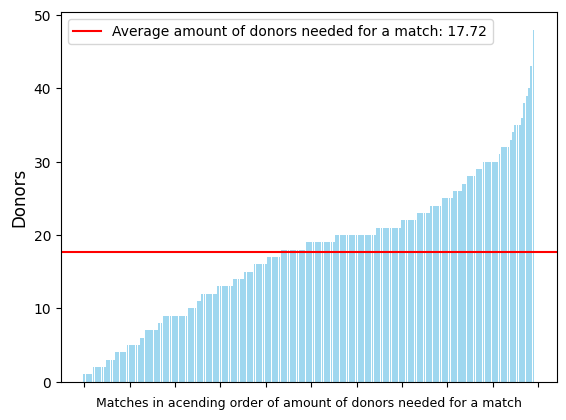

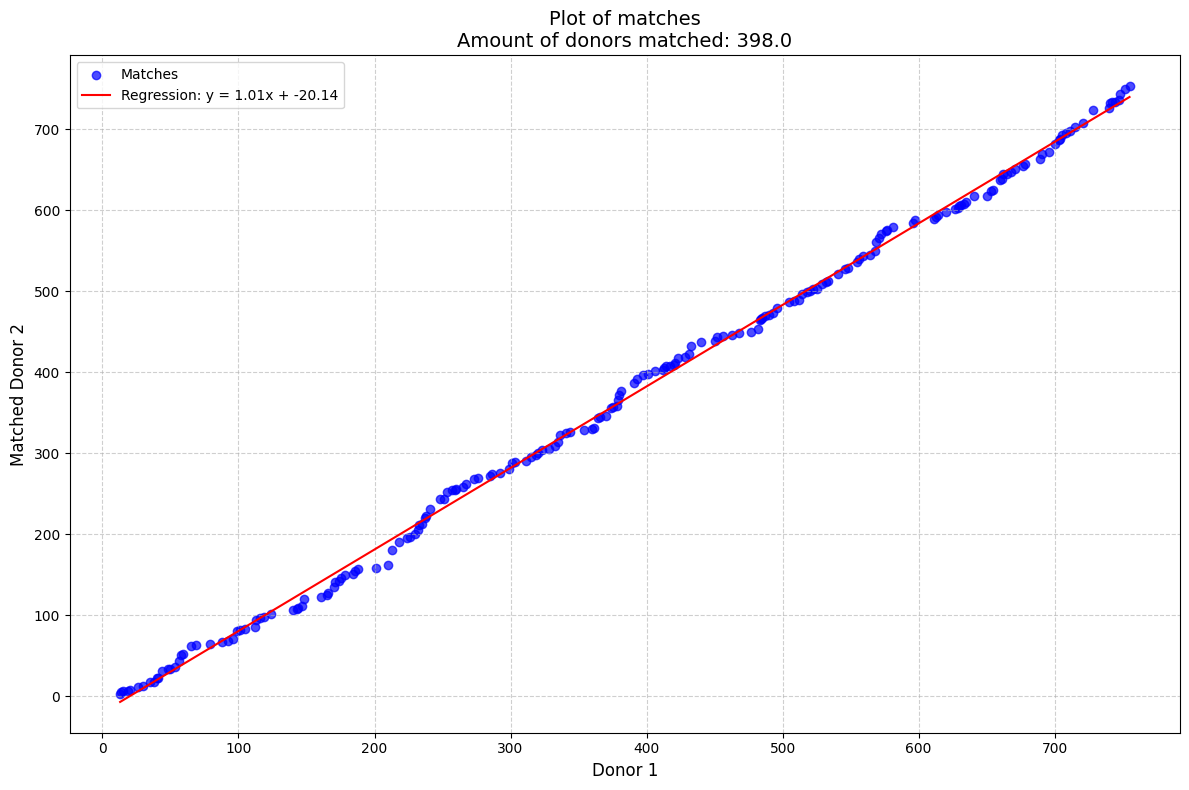

Amount of unmatched Donors:  357.0
Total donors:  755
Time to run:  26.925854682922363


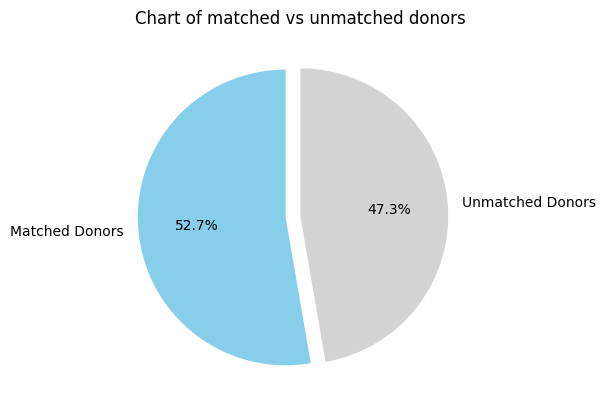

In [ ]:
from os import truncate
import numpy as np
import math

def truncate(number, digits) -> float:
    # Improve accuracy with floating point operations, to avoid truncate(16.4, 2) = 16.39 or truncate(-1.13, 2) = -1.12
    nbDecimals = len(str(number).split('.')[1]) 
    if nbDecimals <= digits:
        return number
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

print("Objective:",m.objVal)

selected_edges = [e for e in G.edges if x[e].X > 0.5]
## Paired Matches
#print(selected_edges)

matches = [(u, v) for u, v in selected_edges]
x_coords, y_coords = zip(*matches)

coefficients = np.polyfit(x_coords, y_coords, 1) 
slope, intercept = coefficients

#Average amount of donors needed for a match
differences = [x_coords - y_coords for x_coords, y_coords in selected_edges]
sorted_differences = sorted(differences)
labels = [f"({x_coords}, {y_coords})" for x_coords, y_coords in selected_edges]
numdonor = sum(differences) / len(differences)
numdonor = truncate(numdonor, 2)
#numofmatch = len(x_coords)
#print(numofmatch)


print("Average amount of donors needed for a match: ", numdonor)
plt.bar(labels, sorted_differences, color='skyblue', alpha=0.8)
#plt.boxplot(sorted_differences, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'))
plt.axhline(y=numdonor, color='r', linestyle='-', label =f'Average amount of donors needed for a match: {numdonor}')
l1=np.arange(0,220,20)
plt.xticks(l1)
plt.xlabel('Matches in acending order of amount of donors needed for a match', fontsize=9)
plt.ylabel('Donors', fontsize=12)
plt.gca().set_xticklabels([]) 
plt.legend()


# Generate regression line
regression_line = [slope * x + intercept for x in x_coords]

# Plot the points
plt.figure(figsize=(12, 8))
plt.scatter(x_coords, y_coords, color='blue', alpha=0.7, label='Matches')
plt.plot(x_coords, regression_line, color='red', label=f'Regression: y = {slope:.2f}x + {intercept:.2f}')

# Add annotations and labels
plt.title('Plot of matches\nAmount of donors matched: 398.0', fontsize=14)
plt.xlabel('Donor 1', fontsize=12)
plt.ylabel('Matched Donor 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

#match to unmatched ratio
tnodes = len(G.nodes)
usednodes = m.objVal
unusednodes = tnodes - usednodes
l = ['Matched Donors', 'Unmatched Donors']
pie = [usednodes, unusednodes]
c = ['skyblue', 'lightgray']
ex = (0.1, 0)
plt.pie(pie, labels=l, autopct='%1.1f%%', startangle=90, colors=c, explode=ex)
plt.title ('Chart of matched vs unmatched donors', fontsize=12)
print('Amount of unmatched Donors: ', unusednodes)
print('Total donors: ', tnodes)

##MAYBE

#plt.boxplot(sorted_differences, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'))


#Time to run total
tmmm = time.time() - t0
print('Time to run: ',tmmm)
